### PHYS 249 Lab 9 Matrices, Eigenvalues, Eigenvectors, etc.


**9.1**

**a)** Consider vectors in $\mathcal{R}^2$:

$$\mathbf{A} = \begin{bmatrix}2 \\ 1\end{bmatrix}; \ \ 
\mathbf{B} = \begin{bmatrix}3 \\ 4\end{bmatrix}; \ \ 
\mathbf{C} = \begin{bmatrix}1 \\ 3\end{bmatrix}; \ \ 
\mathbf{D} = \begin{bmatrix}6 \\ 8\end{bmatrix}; \ \ 
\,.$$

Suppose a linear transformation maps $\mathbf{A}$ to $\mathbf{C}$, $\mathbf{B}$ to  $\mathbf{D}$, and conserves the origin; does this describe it fully? Write out the transformation.


In [2]:
from numpy import array
from numpy.linalg import solve

A = array([[2,1,0,0],[0,0,2,1],[3,4,0,0],[0,0,3,4]],float)
V = array([1,3,6,8],float)

X = solve(A,V)
print(X)
print(X.T)
print("The transformation is:x' =",X[0],"x +",X[1],"y\n")
print("y' =",X[2],"x +",X[3],"y\n")

[-0.4  1.8  0.8  1.4]
[-0.4  1.8  0.8  1.4]
The transformation is:x' = -0.40000000000000036 x + 1.8000000000000003 y

y' = 0.8000000000000002 x + 1.4 y



**9.2**

Generate a 2D array f data, with say 6 rows and 2 columns. Add a final row that is the same as the first. Treating each row as the coordinates of a point, plot the points, joining them with line segments to form a closed figure.

Now, using the rotation matrix in $\mathbf{R}^2$ from last week, rotate the figure by 15 degrees and plot; then rotate by 15 degrees again and plot, and iterate until you have gone around full circle. Note you should add your plots to a figure and only call the function show at the end, so that all the steps appear on a single plot.


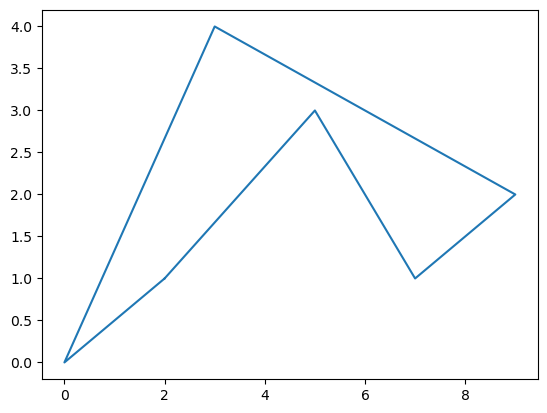

In [1]:
from matplotlib.pyplot import *
from numpy import *
from math import cos,sin,pi

ax = gca()
xlim = (-15,15)
ylim = (-15,15)
ax.set_aspect('equal')

rcParams['figure.figsize'] = [20,20]

D = array([[2,1],[0,0],[3,4],[9,2],[7,1],[5,3],[2,1]],float)

c15 = cos(15/180*pi)
s15 = sin(15/180*pi)

R2xy = array([[c15,-s15],[s15,c15]],float)

plot(D[:,0],D[:,1])

for i in range(12):
    
    Dp = (R2xy@D.T).T
    plot(Dp[:,0],Dp[:,1])
    D = Dp
show()

**9.3** *(Challenging)*

Consider the problem you had previously: in a 2D plane, rays come down from the top of a 10x10 box and strike a parabolic mirror with a surface described by

$$(x,y) = (x,f(y)); \ \ \ f(x) = ax^2 + b\,,$$
with $a = 0.2, b = 1.0$.

After they have reflected once, however, they may then reflect a second time. How would you calculate where they hit the mirror the second time? From there you should be able to draw the second reflected ray.

You can reuse your previous code, or the code below.


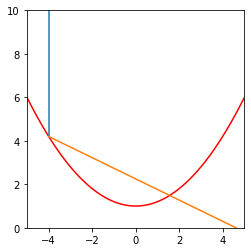

In [1]:
from matplotlib.pyplot import plot, show, xlim, ylim, gca, rcParams
from numpy import linspace, sqrt
# a) set limits

ax = gca()
ax.set_aspect('equal')
#rcParams['figure.figsize'] = [30, 30]
xlim(-5,5)
ylim(0,10)

# b) derive equation for surface and plot it
a = 0.2
b = 1.0

def f(x):
    return(a*x*x + b)
def dfdx(x):
    return(2*a*x)

N = 200
x = linspace(-5,5,N)
y = f(x)
plot(x,y,"r-")

def drawseg_pts(x0,y0,x1,y1):
    xp = []
    yp = []
    xp.append(x0)
    xp.append(x1)    
    yp.append(y0)
    yp.append(y1)
    plot(xp,yp)
    
def drawseg_vec(x0,y0,dx,dy,mult):
    xp = []
    yp = []
    xp.append(x0)
    xp.append(x0+mult*dx)    
    yp.append(y0)
    yp.append(y0+mult*dy)
    plot(xp,yp)


# c) draw incident ray
xv = -4            
drawseg_pts(xv,10,xv,f(xv))

# d) calculate and draw tangent, then normal
slope = dfdx(xv)

xp = xv
yp = f(xv)
dx = 0.1
dy = slope*dx
mult = 20.0
#drawseg_vec(xp,yp,dx,dy,mult)

# draw normal
#drawseg_vec(xp,yp,-dy,dx,mult)

# e) calculate and draw reflected ray

# (all this component-wise)
# form a unit vector in the normal direction en
nrm = sqrt(dx*dx +dy*dy)
enx = -dy/nrm
eny = dx/nrm

#drawseg_vec(xp,yp,enx,eny,1.0)
# form a dv direction vector for the incoming ray (0,-1)
# then project the direction vector onto the normal
# remember this is pv = (dv.en)en
dvx = 0
dvy = -1
dv_dot_en = dvx*enx + dvy*eny
pvx = (dv_dot_en)*enx
pvy = (dv_dot_en)*eny
#drawseg_vec(xp,yp,pvx,pvy,10.0)

# get the transverse component tv = dv - pv

tvx = dvx - pvx
tvy = dvy - pvy
#drawseg_vec(xp,yp,tvx,tvy,10.0)
# flip the projected bit: ov = tv - pv

ovx = tvx - pvx
ovy = tvy - pvy

# draw a segment in this direction

drawseg_vec(xp,yp,ovx,ovy,mult)

#####################################################################
